In [1]:
# Import standard machine learning / data science libraries
%matplotlib inline
from sklearn.utils import shuffle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import GridSearchCV
#from sklearn.model_selection import train_test_split

# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
# Next dataset -- optical recognition
# Load data and shuffle
trainSet = pd.read_csv("G:\GATech\Machine Learning Version 2\optdigits.tra")
trainSet = shuffle(trainSet).reset_index(drop=True)

In [3]:
# See what type of data we are dealing with
print(trainSet.info())
print()
print(trainSet.isnull().any())
print()
print(trainSet.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3823 entries, 0 to 3822
Data columns (total 65 columns):
Block 1     3823 non-null int64
Block 2     3823 non-null int64
Block 3     3823 non-null int64
Block 4     3823 non-null int64
Block 5     3823 non-null int64
Block 6     3823 non-null int64
Block 7     3823 non-null int64
Block 8     3823 non-null int64
Block 9     3823 non-null int64
Block 10    3823 non-null int64
Block 11    3823 non-null int64
Block 12    3823 non-null int64
Block 13    3823 non-null int64
Block 14    3823 non-null int64
Block 15    3823 non-null int64
Block 16    3823 non-null int64
Block 17    3823 non-null int64
Block 18    3823 non-null int64
Block 19    3823 non-null int64
Block 20    3823 non-null int64
Block 21    3823 non-null int64
Block 22    3823 non-null int64
Block 23    3823 non-null int64
Block 24    3823 non-null int64
Block 25    3823 non-null int64
Block 26    3823 non-null int64
Block 27    3823 non-null int64
Block 28    3823 non-null int

In [4]:
testSet = pd.read_csv("G:\GATech\Machine Learning Version 2\optdigits.tes")
testSet.head()

,Block 1,Block 2,Block 3,Block 4,Block 5,Block 6,Block 7,Block 8,Block 9,Block 10,...,Block 56,Block 57,Block 58,Block 59,Block 60,Block 61,Block 62,Block 63,Block 64,Class
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


In [5]:
X_train = trainSet[['Block ' + str(i) for i in range(1, 65)]]
y_train = trainSet[['Class']]

X_test = testSet[['Block ' + str(i) for i in range(1, 65)]]
y_test = testSet[['Class']]

In [6]:
# Multi-class Decision Tree
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
print(dtc.score(X_train, y_train))
print(dtc.score(X_test, y_test))
print(dtc)

1.0
0.8580968280467446
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [7]:
# Roughly 85-86 % were correctly classified
parameters = {"criterion": ["gini", "entropy"],
              "min_samples_split": [2, 5, 10, 15, 20],
              "max_depth": [None, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              "min_samples_leaf": [1, 3, 5, 7, 9, 10],
              "max_leaf_nodes": [None, 5, 10, 15, 20],
              }
clf = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=4, cv = 5)
clf.fit(X=X_train, y=y_train)
dtc = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

0.9026942191995815 {'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [8]:
# Much better -- we obtain 99% accuracy on the training set by tuning hyperparameters and using cross validation
# Now let's visualize this by generating cross validation curves
# Code for generating learning curves

# Learning curves code from https://www.dataquest.io/blog/learning-curves-machine-learning/
from sklearn.model_selection import learning_curve

def learning_curves(estimator, data, features, target, train_sizes, cv, testData):
    train_sizes, train_scores, validation_scores = learning_curve(
                                                 estimator, data[features], data[target], train_sizes = train_sizes,
                                                 cv = cv, scoring = 'accuracy', shuffle=True)
    
    test_scores = learning_curve(estimator, testData[features], testData[target], train_sizes = train_sizes,
                                                 cv = cv, scoring = 'accuracy')[2]
    
    test_scores_mean = test_scores.mean(axis=1)
    
    train_scores_mean = train_scores.mean(axis = 1)
    validation_scores_mean = validation_scores.mean(axis = 1)
    
    plt.plot(train_sizes, train_scores_mean, label = 'Training accuracy')
    plt.plot(train_sizes, validation_scores_mean, label = 'Validation accuracy')
    plt.plot(train_sizes, test_scores_mean, label = 'Test accuracy')

    plt.ylabel('Accuracy', fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14)
    title = 'Learning curves for a ' + str(estimator).split('(')[0] + ' model'
    plt.title(title, fontsize = 18, y = 1.03)
    plt.legend()
    plt.ylim(0.95,1.05,0.1)
    plt.xlim(0, 1500, 100)

Text(0.5,1.03,'Decision Tree Classifier - Optical Recognition')

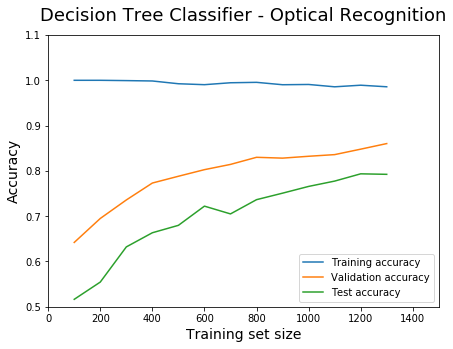

In [9]:
train_sizes = [x for x in range(100, 1400, 100)]
features = ['Block ' + str(i) for i in range(1, 65)]
target = ['Class']
plt.figure(figsize=(7,5))
learning_curves(dtc, trainSet, features, target, train_sizes, 5, testSet)
plt.ylim(0.5,1.1,0.1)
plt.title("Decision Tree Classifier - Optical Recognition", fontsize=18)

In [10]:
print(dtc.score(X_test, y_test))

0.8514190317195326


In [11]:
# 87 %, decent.  Moving onto KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)  
knn.fit(X_train, y_train)

G:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [12]:
knn.score(X_test, y_test)

0.9788536449638287

In [13]:
#97% Before any tuning
import warnings
warnings.filterwarnings('ignore')
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

(0.8, 1.1)

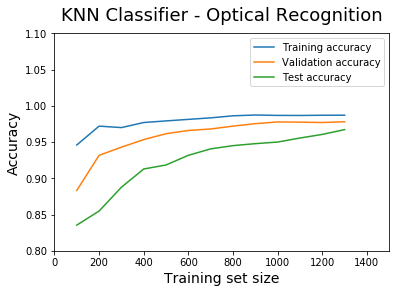

In [14]:

knn = grid.best_estimator_
train_sizes = [x for x in range(100, 1400, 100)]
learning_curves(knn, trainSet, features, target, train_sizes, 5, testSet)
plt.title("KNN Classifier - Optical Recognition", fontsize=18)
plt.ylim(0.8,1.1,0.1)

In [15]:
knn.score(X_test, y_test)

0.9782971619365609

Text(0.5,1,'KNN CV - Optical Recognition')

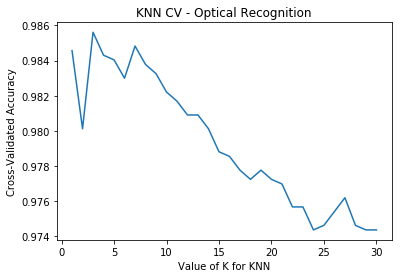

In [16]:
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title("KNN CV - Optical Recognition")

In [17]:
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')


In [18]:
print(knn.score(X_test, y_test))

0.9782971619365609


In [19]:
# 7NN is most accurate with about 97% accuracy

In [20]:
#Now let's do Neural Nets
from sklearn.neural_network import MLPClassifier
ann = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
ann.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [21]:
ann.score(X_test, y_test)

0.6438508625486923

In [22]:
# ~64% accuracy without tuning

In [23]:
parameters = {'solver': ['lbfgs'], 'max_iter': [1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000],
              'alpha': 10.0 ** -np.arange(1, 3), 'hidden_layer_sizes':np.arange(3, 5),
              'random_state':[0,1,2]}
clf = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1)
clf.fit(X_test, y_test)
ann = clf.best_estimator_

In [26]:
print(ann.score(X_train, y_train))
print(ann.score(X_test, y_test))

0.731101229400994
0.7840845854201447


Text(0.5,1.03,'MLP Classifier, Optical Recognition')

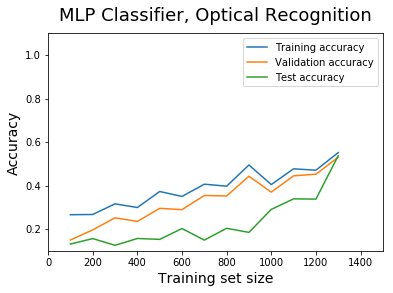

In [29]:
#Increased to 78%
learning_curves(ann, trainSet, features, target, train_sizes, 5, testSet)
plt.ylim(0.1,1.1,0.1)
plt.title("MLP Classifier - Optical Recognition", fontsize = 18)

In [30]:
# Support Vector

In [32]:
from sklearn.svm import SVC
clf = SVC(gamma='auto')
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [33]:
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

1.0
0.562047857540345


In [34]:
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
kernels = ["linear", "rbf"]
parameters = {'C': Cs, 'gamma' : gammas, 'kernel' : kernels}
clf = GridSearchCV(SVC(), parameters, n_jobs=-1)

In [35]:
clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1], 'kernel': ['linear', 'rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [36]:
clf.score(X_train, y_train)

1.0

In [37]:
svc = clf
svc.score(X_test, y_test)

0.9827490261547023

Text(0.5,1.03,'SVM Classifier - Optical Recognition')

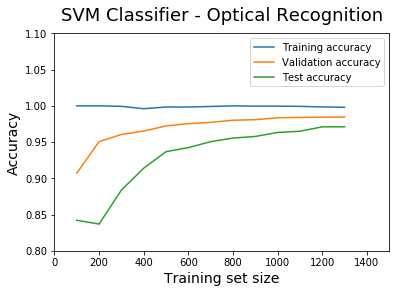

In [43]:
learning_curves(svc, trainSet, features, target, train_sizes, 5, testSet)
plt.ylim(0.8, 1.1, .1)
plt.title("SVM Classifier - Optical Recognition", fontsize=18)

In [47]:
# Adaboost
from sklearn.ensemble import AdaBoostClassifier

In [75]:
abc = AdaBoostClassifier(n_estimators=100, random_state=42, base_estimator = dtc)
abc.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=100, random_state=42)

In [76]:
abc.score(X_train, y_train)

1.0

In [77]:
abc.score(X_test, y_test)

0.9654980523094046

Text(0.5,1.03,'AdaBoost Classifier - Optical Recognition')

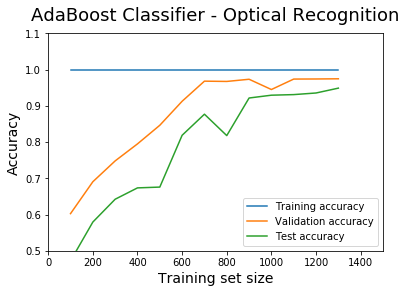

In [78]:
train_sizes = [x for x in range(100, 1400, 100)]
learning_curves(abc, trainSet, features, target, train_sizes, 5, testSet)
plt.ylim(0.5,1.1,0.1)
plt.title("AdaBoost Classifier - Optical Recognition", fontsize=18)

In [79]:
# Accuracies for training and testing
for classifier in [dtc, knn, ann, svc, abc]:
    print (classifier.score(X_train, y_train), classifier.score(X_test, y_test))

0.9803818990321737 0.8514190317195326
0.9926759089720115 0.9782971619365609
0.731101229400994 0.7840845854201447
1.0 0.9827490261547023
1.0 0.9654980523094046


In [80]:
# Wall clock times for training and prediction
import time
trainTimes = []
predictTimes = []
for classifier in [dtc, knn, ann, svc, abc]:
    start = time.time()
    classifier.fit(X_train, y_train)
    end = time.time()
    trainTimes.append(end - start)
    
    start = time.time()
    classifier.predict(X_test)
    end = time.time()
    predictTimes.append(end - start)

In [81]:
print(trainTimes)
print(predictTimes)

[0.04595303535461426, 0.020978689193725586, 7.945737600326538, 31.202612161636353, 3.6662471294403076]
[0.002997159957885742, 0.48250555992126465, 0.0010001659393310547, 0.14086580276489258, 0.05794119834899902]
